# Разведочный анализ данных

### Импорт библиотек и данных

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('Data/heart.csv')
df.head(n=5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,target
0,63,1,3,145,233,1,0,150,0,1
1,37,1,2,130,250,0,1,187,0,1
2,41,0,1,130,204,0,0,172,0,1
3,56,1,1,120,236,0,1,178,0,1
4,57,0,0,120,354,0,1,163,1,1


### Описание датасета

* **age** — возраст пациента
* **sex** — пол пациента (1 = мужчина, 0 = женщина)
* **cp** — тип боли в груди (1 = типичная стенокардия, 2 = атипичная стенокардия, 3 = другой вид боли, 4 = нет боли)
* **trestbps** — артериальное давление в состоянии покоя (мм ртутного столба, на момент госпитализации)
* **chol** — уровень холестерола (мг/дл)
* **fbs** — уровень сахара крови натощак выше 120 мг/дл (1 = да, 0 = нет)
* **restecg** — результат ЭКГ в состоянии покоя (0 = нормальный, 1 = абнормальный, 2 = признаки гипертрофии желудочка)
* **thalach** — максимальная зафиксированная частота сердцебиения
* **exang** — стенокардия в результате физической нагружки (1 = да, 0 = нет)
* **target** — наличие сердечно-сосудистого заболевания (1 = да, 0 = нет)

In [13]:
cat_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'target']
num_features = ['age', 'trestbps', 'chol', 'thalach']

## Базовые графики

### histplot

<AxesSubplot:xlabel='age', ylabel='Count'>

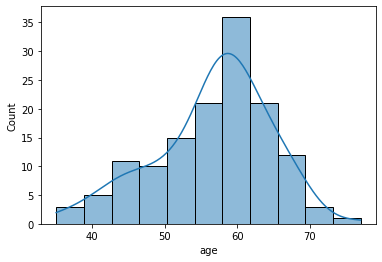

In [6]:
sns.histplot(df[df['target']==0]['age'], kde=True)

### barplot

In [21]:
pd.DataFrame(df['target'].value_counts()).T

,1,0
target,165,138


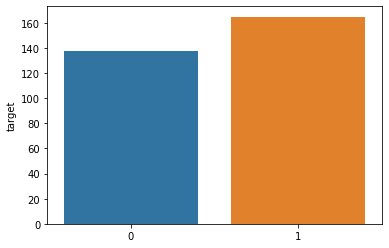

In [19]:
sns.barplot(x=df['target'].value_counts().index, 
            y=df['target'].value_counts());

### violinplot

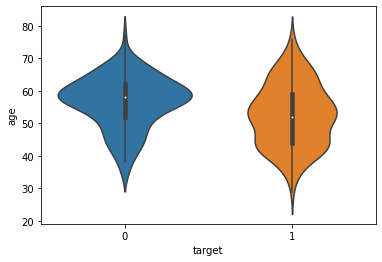

In [24]:
sns.violinplot(x=df['target'], y=df['age']);

### boxplot

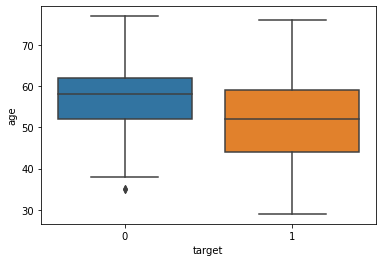

In [25]:
sns.boxplot(x=df['target'], y=df['age']);

## Correlation

### `pd.DataFrame.style.background_gradient()`

In [56]:
correlation = df.loc[:, num_features].corr()

In [57]:
correlation \
    .style.background_gradient(cmap=sns.light_palette("b", as_cmap=True, reverse=False))

,age,trestbps,chol,thalach
age,1.000000,0.279351,0.213678,-0.398522
trestbps,0.279351,1.000000,0.123174,-0.046698
chol,0.213678,0.123174,1.000000,-0.009940
thalach,-0.398522,-0.046698,-0.009940,1.000000


### heatmap

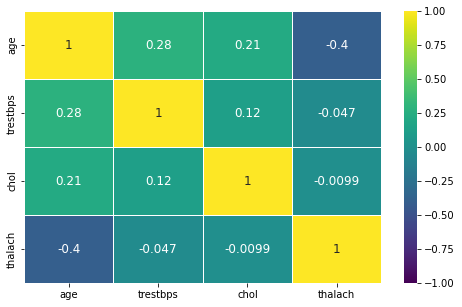

In [58]:
fig, ax = plt.subplots(figsize=(8, 5))

sns.heatmap(data=correlation,  # данные
            linecolor="white", linewidths=0.5,  # разделители между ячейками
            annot=True, annot_kws={'size': 12},  # числа в ячейках + размеры
            vmin=-1, vmax=1,  # лимиты по цветам
            cmap='viridis',
           )
plt.show()

### pairplot

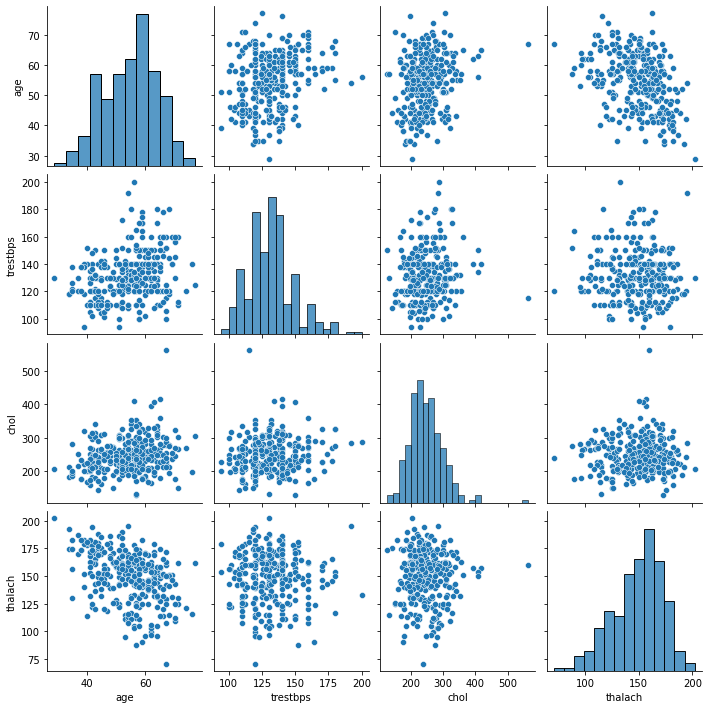

In [59]:
sns.pairplot(data=df[num_features]);

# По-диагонали - распределенение

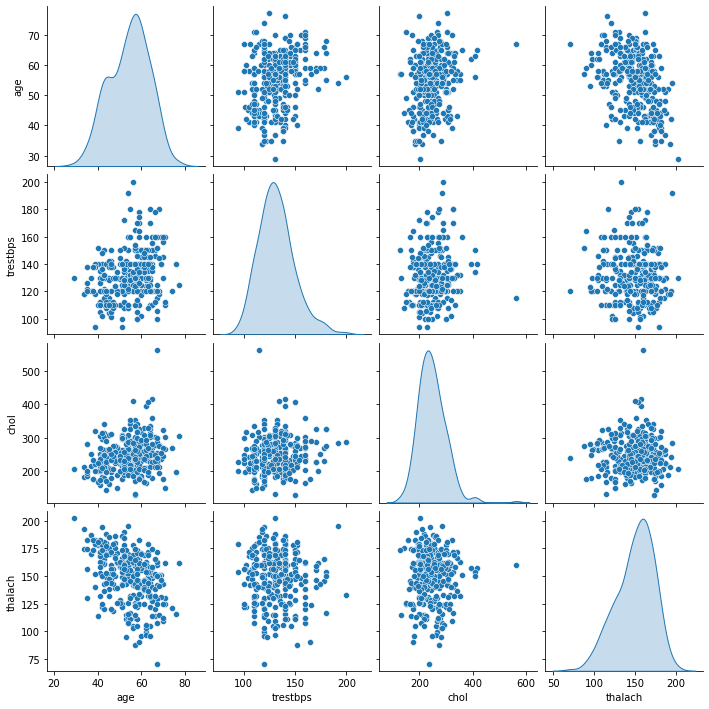

In [61]:
sns.pairplot(data=df[num_features], diag_kind='kde')

# По-диагонали - ядерная оценка плотности

## Построение нескольких графиков сразу

In [62]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,target
0,63,1,3,145,233,1,0,150,0,1
1,37,1,2,130,250,0,1,187,0,1
2,41,0,1,130,204,0,0,172,0,1
3,56,1,1,120,236,0,1,178,0,1
4,57,0,0,120,354,0,1,163,1,1


In [64]:
# Приведение DF к определенному виду  - по сути это unpivot, обратное к сводной таблице

df_melted = pd.melt(frame=df, id_vars='thalach', value_vars=cat_features)
df_melted.head()

,thalach,variable,value
0,150,sex,1
1,187,sex,1
2,172,sex,0
3,178,sex,1
4,163,sex,0


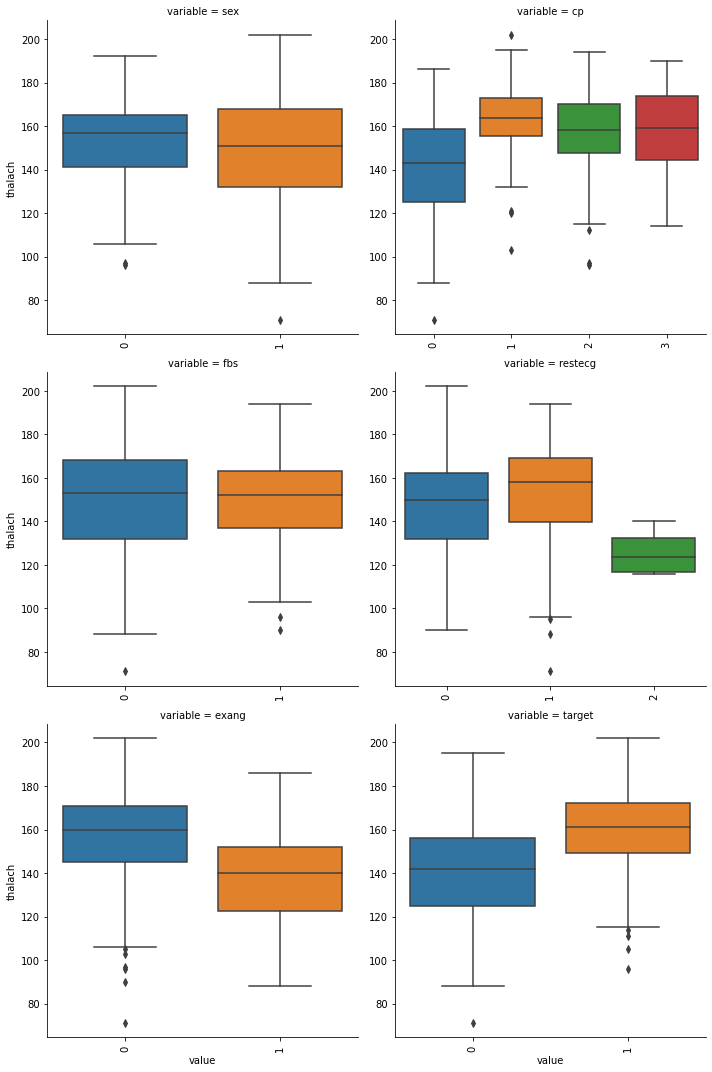

In [68]:
def boxplot(x, y, **kwargs):
    """
    Построение ящиков с усами
    """
    sns.boxplot(x=x, y=y)
    x = plt.xticks(rotation=90)  # разворачивание подписей на 90 градусов


# Построение фасетной сетки
g = sns.FacetGrid(data=df_melted,
                  col="variable",  # подпись
                  col_wrap=2,  # число графиков в колонке
                  sharex=False, sharey=False,  # одикаковая шкала OX, OY для всех графиков
                  height=5  # высота графиков
                 )
g.map(boxplot, "value", 'thalach')
plt.show()